# Mouse Brain Classification


In this lab we will recognize the view in slices of the adult mouse brain (M. musculus P56)

![three_main_anatomical_planes](images/three_main_anatomical_planes.png)

_The  three main anatomical planes exemplified on human brain sketch_

In order to describe the location of structures, mouse brains are often sliced across one of the three main anatomical planes: sagittal, coronal and horizontal (see top-right figure).. Example of slices for adult mouse brains are shown below (source: BrainMaps http://brainmaps.org/index.php?p=speciesdata&species=mus-musculus).

![sagittal_coronal_horizontal](images/sagittal_coronal_horizontal.png)

_The anatomical, coronal, and sagittal planes of a mouse brain _

In this lab we will be recognizing the view (ie whether anatomical, coronal of sagittal) in a  set of images from BrainMaps.  

* We preprocessed the images so that the input os a numpy tensor of shape (N, 512, 512, 3) where N is the number of RGB images of size (512, 512).  

* The classifier should output a vector of size (3,) and dtype float containing the probabilities of the image being sliced horizontally, coronally and sagittally respectively.


These lessons are adapted from submissions to the [Broad Institute of MIT and Harvard and NEU AI Skunkworks Mouse Brain Challenge]( https://www.skonks.com/post/broad-institute-of-mit-and-harvard-and-neu-ai-skunkworks-mouse-brain-challenge) 
by [NEU Skunkworks](https://github.com/skunkworksneu)   
which are published under the [MIT License](https://opensource.org/licenses/MIT) which allows very broad use for both academic and commercial purposes.


## What is "Deep Learning?"

[Deep learning](https://en.wikipedia.org/wiki/Deep_learning) is the stacking of artificial neural networks (ANNs) to create stacked neural networks, [deep belief networks](https://en.wikipedia.org/wiki/Deep_belief_network), [recurrent neural networks](https://en.wikipedia.org/wiki/Recurrent_neural_network) and deep generative models. A deep neural network (DNN) is an ANN with multiple hidden layers between the input and output layers.

An ANN is based on a collection of connected units called artificial neurons, (analogous to axons in a biological brain). Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it.

_ Deep learning is basically the deep stacking of artificial neurons to learn complex models of data. _

## Why Deep Learning?

- It works

Deep learning and neural networks are increasingly important concepts as demonstrated through their performance on difficult problems in computer vision medical diagnosis, natural language processing and many other domains. 

- Learns feature selection   

Deep learning algorithms are unique in that they try to learn latent features from data, as opposed to traditional machine learning where features selection is typically handcrafted. 

## What are "neural networks?"

[Neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network) a form of **[connectionism]**, are computing systems inspired by the
[biological neural networks](https://en.wikipedia.org/wiki/Biological_neural_network) that constitute animal brains. Such systems
learn (progressively improve performance) to do tasks by considering
examples, generally without task-specific programming. For example, in
image recognition, they might learn to identify images that contain cats
by analyzing example images that have been manually [labeled] as \"cat\"
or \"no cat\" and using the analytic results to identify cats in other
images. They have found most use in applications difficult to express in
a traditional computer algorithm using rule-based programming.    

An ANN is based on a collection of connected units called [artificial
neurons](https://en.wikipedia.org/wiki/Artificial_neuron) (analogous to biological neurons in an animal brain). Each
connection synapse between neurons can transmit a signal to another
neuron. The receiving (postsynaptic) neuron can process the signal(s)
and then signal downstream neurons connected to it. Neurons and synapses
may also have a weight that varies as learning proceeds, which can
increase or decrease the strength of the signal that it sends
downstream. Further, they may have a threshold such that only if the
aggregate signal is below (or above) that level is the downstream signal
sent.   

Typically, neurons are organized in layers. Different layers may perform
different kinds of transformations on their inputs. Signals travel from
the first (input), to the last (output) layer, possibly after traversing
the layers multiple times. In artificial networks with multiple hidden
layers, the initial layers might detect primitives (e.g. the pupil in an
eye, the iris, eyelashes, etc..) and their output is fed forward to
deeper layers who perform more abstract generalizations (e.g. eye,
mouth)\.... and so on until the final layers perform the complex object
recognition (e.g. face).    


* But what *is* a Neural Network? [https://youtu.be/aircAruvnKk](https://youtu.be/aircAruvnKk)     
* Gradient descent, how neural networks learn [https://youtu.be/IHZwWFHWa-w](https://youtu.be/IHZwWFHWa-w)   

* What is backpropagation and what is it actually doing?[https://youtu.be/Ilg3gGewQ5U](https://youtu.be/Ilg3gGewQ5U)   

* Backpropagation calculus [https://youtu.be/tIeHLnjs5U8](https://youtu.be/tIeHLnjs5U8)  


## What is a Convolution?

In mathematics (and, in particular, functional analysis)
[convolution](https://en.wikipedia.org/wiki/Convolution)  is a mathematical operation on two functions ($f$
and $g$) to produce a third function, that is typically viewed as a
modified version of one of the original functions, giving the integral
of the pointwise multiplication of the two functions as a function of
the amount that one of the original functions is translated.

![convolution](https://upload.wikimedia.org/wikipedia/commons/2/21/Comparison_convolution_correlation.svg)

Convolution is similar to cross-correlation. For discrete real valued
signals, they differ only in a time reversal in one of the signals. For
continuous signals, the cross-correlation operator is the adjoint
operator of the convolution operator.

It has applications that include probability, statistics, computer
vision, natural language processing, image and signal processing,
engineering, and differential equations.

The convolution can be defined for functions on groups other than
Euclidean space. For example, periodic functions, such as the
discrete-time Fourier transform, can be defined on a circle and
convolved by *periodic convolution*. A *discrete convolution* can be defined for functions on
the set of integers.

Generalizations of convolution have applications in the field of
numerical analysis and numerical linear algebra, and in the design
and implementation of finite impulse response filters in signal
processing.

Computing the inverse of the convolution operation is known as
_deconvolution_.


### Sobel Convolution

The Sobel operator (https://en.wikipedia.org/wiki/Sobel_operator) uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical. If we define A as the source image, and Gx and Gy are two images which at each point contain the horizontal and vertical derivative approximations respectively, the computations are as follows


```python  
Gx = np.array([[-1, 0, +1],[-2, 0, +2],[-1, 0, +1]])
Gy = -Gx.transpose()
```  

Since the Sobel kernels can be decomposed as the products of an averaging and a differentiation kernel, they compute the gradient with smoothing.


The **Sobel operator**, sometimes called the **Sobel--Feldman operator**
or **Sobel filter**, is used in image processing and computer
vision, particularly within edge detection algorithms where it
creates an image emphasising edges. It is named after Irwin Sobel and
Gary Feldman, colleagues at the Stanford Artificial Intelligence
Laboratory (SAIL). Technically, it is a discrete differentiation operator, computing
an approximation of the gradient of the image intensity function. At
each point in the image, the result of the Sobel--Feldman operator is
either the corresponding gradient vector or the norm of this vector.
The Sobel--Feldman operator is based on convolving the image with a
small, separable, and integer-valued filter in the horizontal and
vertical directions and is therefore relatively inexpensive in terms of
computations. On the other hand, the gradient approximation that it
produces is relatively crude, in particular for high-frequency
variations in the image.

### Formulation


The operator uses two 3×3 kernels which are convolved with the
original image to calculate approximations of the derivatives -- one
for horizontal changes, and one for vertical. If we define **A** as the
source image, and **G**~*x*~ and **G**~*y*~ are two images which at each
point contain the horizontal and vertical derivative approximations
respectively, the computations are as follows:  

$$\mathbf{G}_x = \begin{bmatrix} 
 +1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix} * \mathbf{A}
\quad
\mbox{and}
\quad   
\mathbf{G}_y = \begin{bmatrix} 
 +1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix} * \mathbf{A}$$

where $*$ here denotes the 2-dimensional signal processing
convolution operation.

Since the Sobel kernels can be decomposed as the products of an
averaging and a differentiation kernel, they compute the gradient with
smoothing. For example, $\mathbf{G_x}$ can be written as

$$\begin{bmatrix} 
+1 & 0 & -1 \\
+2 & 0 & -2 \\
+1 & 0 & -1
\end{bmatrix}
=
\begin{bmatrix}
1\\
2\\
1
\end{bmatrix}
\begin{bmatrix}
+1 & 0 & -1
\end{bmatrix}$$

The *x*-coordinate is defined here as increasing in the
"right"-direction, and the *y*-coordinate is defined as increasing in
the "down"-direction. At each point in the image, the resulting
gradient approximations can be combined to give the gradient magnitude,
using:

$$\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }$$

Using this information, we can also calculate the gradient\'s direction:

$$\mathbf{\Theta} = \operatorname{atan}\left({ \mathbf{G}_y \over \mathbf{G}_x }\right)$$
where, for example, **Θ** is 0 for a vertical edge which is lighter on
the right side.


The images below are examples of the Sobel operator applied to three images after being converted to black & white.  

![Sobel operator](images/sobel.png)

_Sobel operator applied to three images after being converted to black & white _


## What is a Convolutional Neural Network?

A convolutional neural network (CNN) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are characterized by having convolutional layers and pooling before being connected to a multilayer perceptron (MLP).

* Input layer
* Convolutional layer
* Pooling layer
* Fully connected layer (MLP)
* Output layer

When programming a CNN, each convolutional layer within a neural network should have the following attributes:

* Input is a tensor with shape (number of images) x (image width) x (image height) x ([[image depth]]). 
* Convolutional kernels whose width and height are hyper-parameters, and whose depth must be equal to that of the image. Convolutional layers convolve the input and pass its result to the next layer. This is similar to the response of a neuron in the visual cortex to a specific stimulus. 

_Input layer_

With images typically each pixel is mapped to an input neuron. In our case we preprocess the images all to have size 512 by 512 with 3 channels, which means 512 x 512 x 3 = 786,432 input neurons.  Further if the images are in the typical 0 to 255 ranges we will scale them to a range of 0 to 1 by dividing by 255.  Becuase of the feedforward nature of neural networks large ranges in numbers being multiplied again and again can cuase issues so scaling is fairly standard.

_Convolutional layer_

Filters can be handcrafted, such as sobel edge detectors, however convolutional neural networks is to learn the filters. As such the learn to detect features, rather than the feature detection being prespecified.

The output from multiplying the filter with the input array one time is a single value. As the filter is applied multiple times to the input array, the result is a two-dimensional array of output values that represent a filtering of the input. As such, the two-dimensional output array from this operation is called a “feature map“.

The convolutional layer is the core building block of a CNN. The layer's parameters consist of a set of learnable filters (or kernels), which have a small receptive field, but extend through the full depth of the input volume. During the forward pass, each filter is convolved across the width and height of the input volume.

In effect, one is training a neural network on a portion of the data to discover local spatial features that enhance the detection of the output.  



_Padding and Stride_  


A 3x3 or 4x4 kernal may not match an image size exactly. To make the kernal fit one might add numbers to the borders. Zero-padding refers to the process of symmetrically adding zeroes to the input matrix. In effect, since zero represents black, zero-padding is the equivelent to adding a black border to an image.  Nearest neighbor padding would add colors most similar to adjancent pixels.  

The distance that filter is moved across the the input from the previous layer each activation is referred to as the stride. Increasing the stride prevents the convolutions from creating a very large feature space output.  


_Pooling layer_

Convolutional networks may include local or global pooling layers to streamline the underlying computation. Pooling layers reduce the dimensions of the data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. Local pooling combines small clusters, typically 2 x 2. Global pooling acts on all the neurons of the convolutional layer.

Nooling, which is a form of non-linear down-sampling. There are several non-linear functions to implement pooling among which max pooling is the most common. It partitions the input image into a set of non-overlapping rectangles and, for each such sub-region, outputs the maximum.


![Max pooling](images/Max_pooling.png)

*Max pooling with a 2x2 filter and stride = 2*


_Fully connected layer (MLP)_

The fully connected layer is used for supervised learning.  The feature map produced by the convolutional layers can by used as input to any supervised learning approach that works for the type of analysis (regression or classification). By default most CNNs used MLPs, as they can easily be directly connected to the convolutional layer. A MLP may not produce the best results and so using other forms of learning with the convolutional layers feature extraction should always be considered. 

_Output layer_

The output layer should match the dependent variable. In our case we have three classes, the three main anatomical planes: sagittal, coronal and horizontal.  These classes need to be made numeric for use in a neural network so we one-hot encode the classes.  Further, since we want probabilties of each class the softmax function.

The **softmax function,** also known as **softargmax** or **normalized exponential function**,is a function that takes as input a vector of *K* real numbers, and
normalizes it into a probability distribution consisting of *K* probabilities proportional to the exponentials of the input numbers.

That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the components will add up to 1, so that they can be interpreted as probabilities.  

The standard (unit) softmax function $\sigma : R^K\to R^K$is defined by the formula

$$\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \text{ for } i = 1, \dotsc , K \text{ and } \mathbf z=(z_1,\dotsc,z_K) \in R^K$$

_Useful links for convolutional networks_  

* Convolutional Networks [https://youtu.be/jajksuQW4mc](https://youtu.be/jajksuQW4mc)  
* Deep Learning: What Are Convolutional Neural Networks? [https://youtu.be/ixF5WNpTzCA](https://youtu.be/ixF5WNpTzCA)  
(http://nikbearbrown.com/YouTube/MachineLearning/IMG/Convolutional_Neural_Networks.png )
* MIT 6.S191 Lecture 3: Convolutional Neural Networks [https://youtu.be/v5JvvbP0d44](https://youtu.be/v5JvvbP0d44)   

## Import the Libraries

Importing all the necessary libraries to help with image preprocessing and CNN modelling 

In [3]:
import pandas as pd
import os
import tensorflow as tf
from PIL import Image 
import numpy as np
import imageio 

# Dataset Analysis and Preprocessing

## Preprocessing

Preprocessing is a critical part of using Convolutional Neural Network. All the images need to be of the same size. Standard machine vision can be used in addition to the standard R, G and B channels. The images of adult mouse brains from BrainMaps (http://brainmaps.org/index.php?p=speciesdata&species=mus-musculus) can come at VERY high resolution. 

However the input is a tensor with shape (number of images) x (image width) x (image height) x ([[image depth]]). So if one chooses a 512x512 RGB image one has 786,432 input neurons. (512 x 512 x 3 = 786,432). If one doubles the resolution from 512x512 RGB to 1024x1024 RGB (1024 x 1024 x 3 = 3,145,728) one goes from 700K to 3 million input neurons.

Included with this lab are notebooks from the 

The following students have generously contributed their work to this lab.  

Nikunj Lad (https://www.linkedin.com/in/nikunjlad/, https://github.com/nikunjlad), Raghav Avasthi (https://www.linkedin.com/in/raghav-avasthi/, https://github.com/RaghavAvasthi), Shreya Gaddam (https://www.linkedin.com/in/shreyagaddam), Ziqing Lu (https://www.linkedin.com/in/ziqinglu/, https://github.com/ziqlu0722)  

You can see their individual approaches, including the preprocessing of data but studying their submissions to the Broad Institute of MIT and Harvard and NEU AI Skunkworks Mouse Brain Challenge (https://www.skonks.com/post/broad-institute-of-mit-and-harvard-and-neu-ai-skunkworks-mouse-brain-challenge) is recommended


_Transfer Learning_

Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task.  You see in the other submissions in which CNNs that were trained for other image recognition tasks were retrained on these images.

See

* Transfer Learning (C3W2L07) https://youtu.be/yofjFQddwHE     
* Transfer Learning | Kaggle https://youtu.be/mPFq5KMxKVw  


## 1. Function to Find the Image Statistics 

This function is used to find the average, minimum and maximum height and width of all the images in the dataset. It helps in identifying if all the images in the dataset have a uniform size of 512x512. 

In [4]:
def get_size_stats(img_dir):
  heights = []
  widths = []
  for img in os.listdir(img_dir): 
    path = os.path.join(img_dir, img)
    data = np.array(Image.open(path)) #PIL Image library
    heights.append(data.shape[0])
    widths.append(data.shape[1])
  avg_height = sum(heights) / len(heights)
  avg_width = sum(widths) / len(widths)
  print("Average Height: " + str(avg_height))
  print("Max Height: " + str(max(heights)))
  print("Min Height: " + str(min(heights)))
  print('\n')
  print("Average Width: " + str(avg_width))
  print("Max Width: " + str(max(widths)))
  print("Min Width: " + str(min(widths)))

## 2. Function to perform one hot encoding 

This function returns an numpy array based on the label of the image. The technique used here is called one hot encoding which is used to represent the labels of the dataset in integer form suitable for CNN models. 

In [5]:
def label_img(name):
  if name == 'Coronal' : return np.array([1, 0, 0])
  elif name == 'Horizontal' : return np.array([0, 1, 0])
  elif name == 'Saggital' : return np.array([0, 0, 1])

## 3. Function to load training data

This function helps in loading the training dataset and its corresponding labels into lists. Another important task of this function is to resize the image into 512x512 pixels which is the specified size. 

In [21]:
IMG_SIZE = 512
def load_training_data(img_dir, train_data, train_label):
  for img in os.listdir(img_dir):
    label = label_img(img_dir)
    path = os.path.join(img_dir, img)
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    train_data.append(np.array(img))
    train_label.append(np.array(label))

## 4. Analysis

The dataset is divided into three folders depending on its label i.e., Coronal, Horizontal and Saggital. The size of the images in each of these folders is analysed to indentify if they are uniform and of the size 512x512 pixels. 

In [22]:
img_dirh = "Horizontal"
img_dirc = "Coronal"
img_dirs = "Saggital"

In [8]:
get_size_stats(img_dirc)

Average Height: 369.99376947040497
Max Height: 888
Min Height: 80


Average Width: 547.2211838006231
Max Width: 1440
Min Width: 129


In [10]:
get_size_stats(img_dirh)

Average Height: 1215.8882352941177
Max Height: 2250
Min Height: 134


Average Width: 982.7764705882353
Max Width: 1620
Min Width: 105


In [11]:
get_size_stats(img_dirs)

Average Height: 1704.3994638069705
Max Height: 3552
Min Height: 76


Average Width: 3228.9142091152817
Max Width: 7440
Min Width: 133


The size of the images in each of these classes in not uniform and not equal to the specified 512x512 pixel size. Thus, all the images need to be resized to 512x512 with RGB channel to be to train a CNN model.

## 5. Preprocessing and Loading the Dataset

After analysing the images, the images are converted into 512X512 RGB to maintain uniformity. 

After preprocessing the dataset, the images in the dataset and its labels are loaded in form of numpy arrays and appended into lists. All the images from the three classes are loaded into a list called 'data' and the labels into a list called 'label'. 

In [23]:
data = []
label = []
load_training_data(img_dirc, data, label)
load_training_data(img_dirh, data, label)
load_training_data(img_dirs, data, label)


# Train-Test Split of Dataset

After preprocessing and loading the dataset, we split the entire data into training and testing data so that we can evaluate the model with out of sample data inorder to estimate the accuracy of the model. 

Here, 80% of the entire data becomes the training data and 20% of the data becomes testing data. 

The training data is almost equally distributed among the three classes as evident from the bar graph which helps in better prediction results for all the three classes without bias. 

### 1. Split the data into training data and testing data 

In [24]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(data, label, test_size = 0.2, random_state = 0)

### 2. Converting the training data and testing data into numpy arrays

In [39]:
xTrain = np.array(xTrain)
xTest = np.array(xTest)
yTrain = np.array(yTrain)
yTest = np.array(yTest)

### 3. Studying the distribution of the data 

Number of Coronal Images in the Train dataset: 265
Number of Horizontal Images in the Train dataset: 272
Number of Saggital Images in the Train dataset: 290


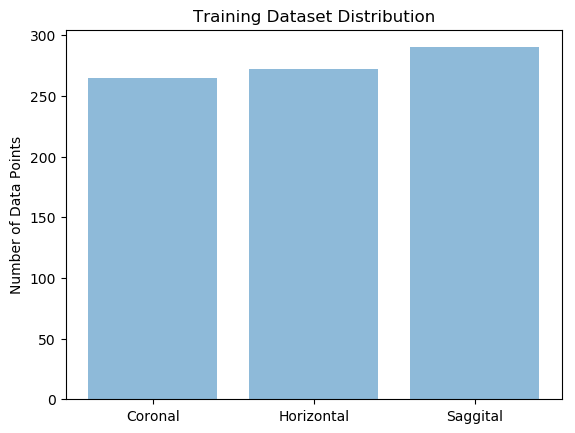

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

x = 0
y = 0
z = 0
for dp in yTrain:
    if np.array_equal(dp, [1, 0, 0]) == True:
        x = x+1
    if np.array_equal(dp, [0, 1, 0]) == True:
        y = y+1
    if np.array_equal(dp, [0, 0, 1]) == True:
        z = z+1
print("Number of Coronal Images in the Train dataset:",x)
print("Number of Horizontal Images in the Train dataset:",y)
print("Number of Saggital Images in the Train dataset:",z)
objects = ('Coronal', 'Horizontal', 'Saggital')
labels = np.arange(len(objects))
NumberOfDataPoints = [x,y,z]

plt.bar(labels, NumberOfDataPoints, align='center', alpha=0.5)
plt.xticks(labels, objects)
plt.ylabel('Number of Data Points')
plt.title('Training Dataset Distribution')

plt.show()

From the bar graph above, it is evident that the distribution of the training dataset is almost uniform with about 270-290 images in each class. 

Saggital class has slightly more number of images than the other two classes so we can expect the model to perform very well in the case of Saggital image classfication. 

### Checking if the dataset is properly loaded

After loading the dataset, to check if the dataset has been loaded properly, we convert a data point from the training data from numpy array and plot it as an image. 

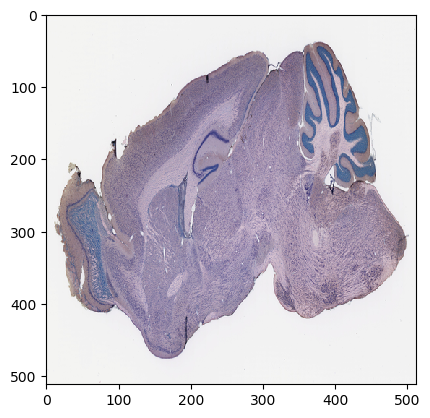

In [42]:
import matplotlib.pyplot as plt
plt.imshow(xTrain[209], cmap = 'gist_gray')

# Model 1

### 1. Model Structure

The convolutional neural network i.e., model 1 has 5 convolution layers followed by 5 Max pooling layers with Batch Normalisation before every convolution layer. 

1. The first layer of this sequential model is the convolution layer which takes 512x512 images as input. 
2. The last layer of this model employs a softmax function to output the probabilities of the three classes. 
3. This model employs two fully connected layers one of which is the output layer with softmax.
4. All the layers use the ReLU activation function. 
5. Just before the output layer, a dropout is used to avoid overfitting of data in the model. 

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### 2. Optimizers and Metrics

For model 1, the Stochastic Descent Gradient i.e., SGD optimizer is used. 

Categorical Crossentropy is used to calculate the loss of the model while training and categorical accuracy gives the training accuracy at every epoch. 

### 3. Training

The model is trained for 10 epochs with the training data and a batch size of 32 and the loss and accuracy are calculated at every epoch. 

In [45]:
from keras.optimizers import SGD
from keras import metrics
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics = [metrics.categorical_accuracy], optimizer=sgd)

history = model.fit(xTrain, yTrain, batch_size=32, epochs=10)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
827/827 [==============================] - 750s 907ms/step - loss: 0.3048 - categorical_accuracy: 0.8888
Epoch 2/10
827/827 [==============================] - 784s 948ms/step - loss: 0.0482 - categorical_accuracy: 0.9843
Epoch 3/10
827/827 [==============================] - 800s 967ms/step - loss: 0.0483 - categorical_accuracy: 0.9807
Epoch 4/10
827/827 [==============================] - 800s 967ms/step - loss: 0.0106 - categorical_accuracy: 0.9976
Epoch 5/10
827/827 [==============================] - 802s 970ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 6/10
827/827 [==============================] - 803s 971ms/step - loss: 0.0048 - categorical_accuracy: 0.9988
Epoch 7/10
827/827 [==============================] - 807s 976ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 8/10
827/827 [==============================] - 804s 972ms/step - loss: 0.0073 - categorical_accuracy: 0.9976
Epoch 9/10
827/827 [====

### 4. Testing 

To evaluate the model, the testing dataset of 207 images is used to find out the testing loss and accuracy. 

1. The loss value of this model is 0.0897 and,
2. The accuracy of this model is approximately 98%

In [137]:
loss, accuracy = model.evaluate(xTest, yTest, batch_size=32)
print(loss, accuracy)

207/207 [==============================] - 60s 289ms/step
0.08979437249186246 0.9806763290783057


# Model 2

### 1. Model Architecture

Model 2 is similar to model 1 but has some different parameters.
The convolutional neural network i.e., model 2 has 5 convolution layers followed by 5 Average pooling layers with Batch Normalisation before every convolution layer. 

1. The first layer of this sequential model is the convolution layer which takes 512x512 images as input. 
2. The last layer of this model employs a softmax function to output the probabilities of the three classes. 
3. This model employs two fully connected layers one of which is the output layer with softmax.
4. All the layers use the ReLU activation function, except one of the fully connected layers uses a LeakyReLU activation function. 
5. In the model 2, the Adam optimiser is used as compared to model 1 where SGD optimizer is used. 
6. Just before the output layer, a dropout is used to avoid overfitting of data in the model. 

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, AveragePooling2D, BatchNormalization, LeakyReLU
model2 = Sequential()
model2.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model2.add(AveragePooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(AveragePooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(AveragePooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model2.add(AveragePooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(AveragePooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(LeakyReLU(alpha=0.05))
#model.add(Dropout(0.3))
model2.add(Dense(3, activation = 'softmax'))

### 2. Optimizer and Metrics

For model 1, the Adam optimizer is used. 

Categorical Crossentropy is used to calculate the loss of the model while training and categorical accuracy gives the training accuracy at every epoch.

### 3. Training

The model is trained for 10 epochs with the training data and a batch size of 32 and the loss and accuracy are calculated at every epoch.


In [48]:
from keras.optimizers import Adam
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model2.compile(loss='categorical_crossentropy', metrics = [metrics.categorical_accuracy], optimizer=adam)

history2 = model2.fit(xTrain, yTrain, batch_size=32, epochs=10)


Epoch 1/10
827/827 [==============================] - 736s 890ms/step - loss: 0.2954 - categorical_accuracy: 0.9117
Epoch 2/10
827/827 [==============================] - 725s 877ms/step - loss: 0.1177 - categorical_accuracy: 0.9674
Epoch 3/10
827/827 [==============================] - 717s 867ms/step - loss: 0.1240 - categorical_accuracy: 0.9686
Epoch 4/10
827/827 [==============================] - 712s 861ms/step - loss: 0.0437 - categorical_accuracy: 0.9940
Epoch 5/10
827/827 [==============================] - 712s 861ms/step - loss: 0.0302 - categorical_accuracy: 0.9903
Epoch 6/10
827/827 [==============================] - 713s 863ms/step - loss: 0.0211 - categorical_accuracy: 0.9915
Epoch 7/10
827/827 [==============================] - 710s 858ms/step - loss: 0.0226 - categorical_accuracy: 0.9903
Epoch 8/10
827/827 [==============================] - 710s 859ms/step - loss: 0.0266 - categorical_accuracy: 0.9940
Epoch 9/10
827/827 [==============================] - 710s 859ms/step - 

### 4. Testing 

To evaluate the model2, the testing dataset of 207 images is used to find out the testing loss and accuracy. 

1. The loss value of this model is approximately 0.81 and,
2. The accuracy of this model is approximately 89%

The loss value is higher in model 2 is higher than that of model 1 and the accuracy of model2 is less than that of model1, when testing loss and accuracy are considered. 

Thus, we can say that model1 is a better model than model2. 

In [50]:
loss2, accuracy2 = model2.evaluate(xTest, yTest, batch_size=32)
print(loss2, accuracy2)

207/207 [==============================] - 92s 444ms/step
0.8172577740489573 0.8985507252135715


# Training Accuracy Plot - Model 1 vs. Model 2

For the model 1, the training accuracy plot depicts how the training accuracy for model 1 increases with the number of epochs and reaches a plateau during the final epochs. This shows that model 1 reaches a desired accuracy within 10 epochs. 

Unlike the model 1, training accuracy plot for the model 2 plateaus for a couple of epochs and then varies for the last few epochs thereby not reaching a stable accuracy within the 10 epochs. 


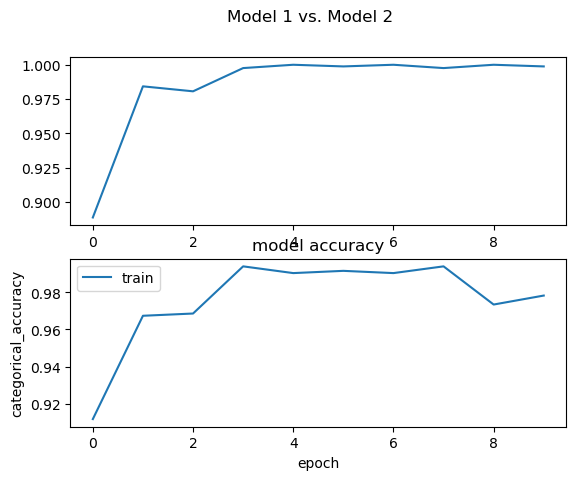

In [68]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(history.history['categorical_accuracy'])
ax2.plot(history2.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Loss Value Plot - Model 1 vs. Model 2

The loss value curves for model 1 stabilizes during the last few epochs of the entire duration of the training process unlike the loss value curves of the model 2 which doesn't plateau during the entire training process. 


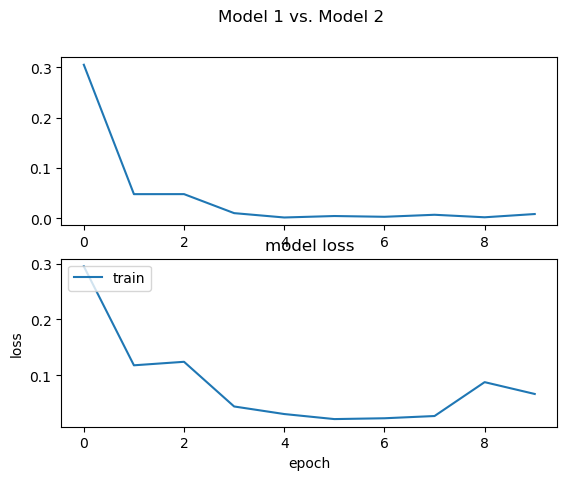

In [69]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(history.history['loss'])
ax2.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Input and Output Requirements

The input should be in the form of a numpy array of shape (N, 512, 512, 3) where N is the number of input images. 

The output should be in the form of a (3,) vector containing the probability values for the three classes

# Making predictions on out of sample data

Model 1 is used to make predictions on random out of sample data. The images are resized according to input requirements and predictions are recorded. 

The index of the maximum value of the output tensor indicates if a certain image is Coronal, Horizontal or Sagittal. 

### Input shape

The shape of the input i.e., (N, 512, 512, 3) is demonstrated below

In [71]:
import cv2
import glob
test_data = []
n = 0
for img in os.listdir("Test"): 
    n = n+1
    path = os.path.join("Test", img)
    image = Image.open(path)
    image = image.convert('RGB')
    image = image.resize((512, 512), Image.ANTIALIAS)
    test_data.append(np.array(image))
                    
test_data = np.array(test_data)
print(test_data.shape)
yPredict1 = model.predict(test_data, batch_size = 32)
yPredict2 = model2.predict(test_data, batch_size = 32)

(5, 512, 512, 3)


In [76]:
yPredict1 = yPredict1.astype(float)
yPredict2 = yPredict2.astype(float)


### Output shape 

To demonstrate the shape of the output i.e., (3, )

In [77]:
for i in range(n):
    predictions = yPredict1[i].reshape(3,)
    print(predictions)
    print(predictions.shape)
    index = np.argmax(predictions)
    if index == 0:        #According to one hot encoding above, 0 is Coronal, 1 is Horizontal and 2 is Sagittal.
        print("Coronal")
    elif index == 1: 
        print("Horizontal")
    elif index == 2: 
        print("Sagittal")

[6.25307848e-07 9.99999046e-01 3.55031972e-07]
(3,)
Horizontal
[1.19411701e-03 2.51279940e-04 9.98554647e-01]
(3,)
Sagittal
[2.61341174e-05 9.99972343e-01 1.50922472e-06]
(3,)
Horizontal
[0.03760412 0.95726186 0.00513401]
(3,)
Horizontal
[2.12955729e-05 1.59147912e-05 9.99962807e-01]
(3,)
Sagittal


# Conclusion

Though models 1 and 2 have the same architecture, they have different hyperparameters like activation functions, optimizers and pooling layers. The loss value for model 1 is around 0.089 and that of model 2 is 0.81. The higher the cost value, poorer the model functions. Thus, the model 1 classifies the different slices of the adult mouse brain better than model 2. 

This is also evident from the fact that accuracy of model 1 is approximately 98% and that of model 2 is around 89% only as well as from the shape of the training accuracy and loss of both the models. 

# Citations

[1] BrainMaps Organisation - Mus Musculus Dataset. Retrieved from http://brainmaps.org/index.php?p=speciesdata&species=mus-musculus

[2] Shorten, C. Y. 2018. Image Classification Keras Tutorial: Kaggle Dog Breed Challenge. Retrieved from https://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8

[3] Guide to Sequential Model. Retrieved from https://keras.io/getting-started/sequential-model-guide/

[4] Siddiqui, A. Y.2017. Data Visualization in Python — Bar Graph in Matplotlib. Retrieved from https://medium.com/python-pandemonium/data-visualization-in-python-bar-graph-in-matplotlib-f1738602e9c4

[5] Usage of Optimizers. Retrieved from https://keras.io/optimizers/

[6] Train-Test Split. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[7] Srinidhi, S. Y.2018. How to split your dataset to train and test datasets using SciKit Learn. Retrieved from https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d

[8] Pooling Layers. Retrieved from https://keras.io/layers/pooling/

[9] Brownlee, J. Y. 2019. A Gentle Introduction to Pooling Layers for Convolutional Neural Networks. Retrieved from https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/


#  License

Copyright 2019 Shreya Gaddam and Nicholas Brown https://github.com/nikbearbrown

In addition there were contributions by Nikunj Lad (https://www.linkedin.com/in/nikunjlad/, https://github.com/nikunjlad), Raghav Avasthi (https://www.linkedin.com/in/raghav-avasthi/, https://github.com/RaghavAvasthi), Ziqing Lu (https://www.linkedin.com/in/ziqinglu/, https://github.com/ziqlu0722)  

We also like to thank the Broad Institute of MIT and Harvard and NEU AI Skunkworks Mouse Brain Challenge (https://www.skonks.com/post/broad-institute-of-mit-and-harvard-and-neu-ai-skunkworks-mouse-brain-challenge) 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.